<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-02_Machine_Learning/231228_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC(DecisionTree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()     #붓꽃 데이터 로드
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)   #feater_names -> dfX
dfy = pd.DataFrame(iris.target, columns=['target'])     #품종

dfX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split
# 훈련/검증 자료 분류
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

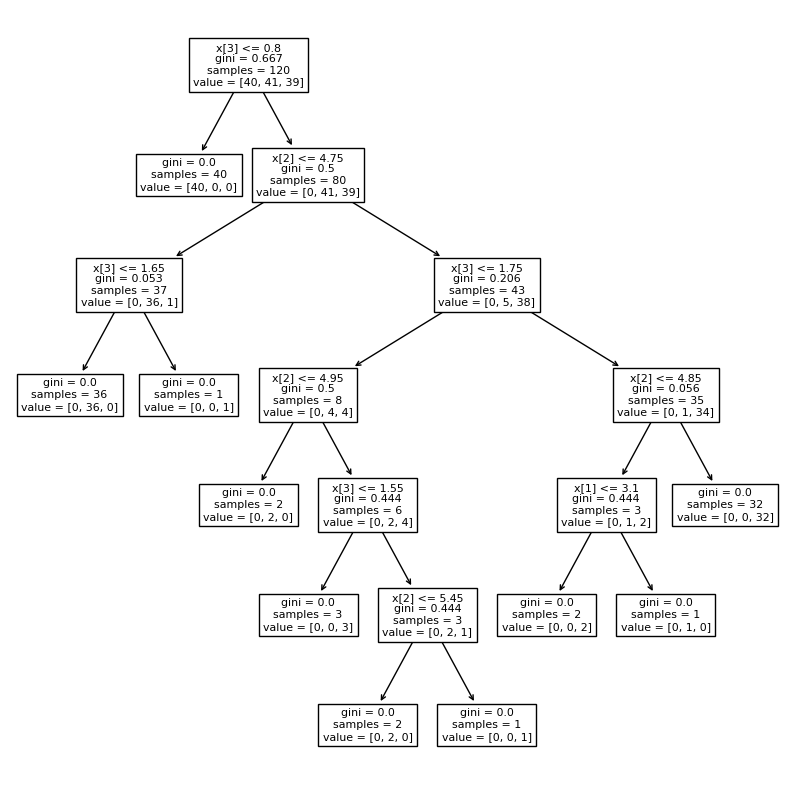

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()      #decisionTree 모델 가져오기
dtc.fit(X_train,y_train)            #데이터를 모델에 fitting 함

plt.figure(figsize=(10,10))
plot_tree(dtc)      #fitting한 결과인 dtc를 plot_tree로 찍어본다.
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


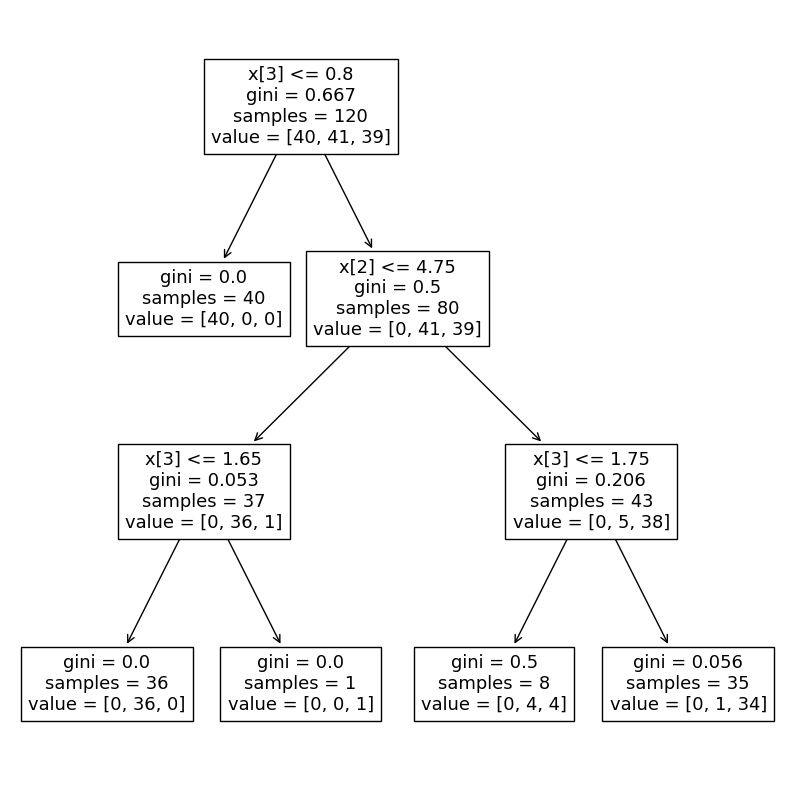

In [ ]:
# 최대깊이를 조절해서 과적합을 방지함
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


## 펭귄 데이터 결정 트리 실습

In [ ]:
import pandas as pd
from sklearn import datasets

penguin_df = pd.read_csv('/content/penguins.csv')

In [ ]:
penguin_df.isnull().sum() # 결측치 확인
df_cleaned = penguin_df.dropna()
del df_cleaned['island']
del df_cleaned['sex']
df_cleaned

import pandas as pd
from sklearn import datasets

X = df_cleaned.iloc[:, 1:]
y = df_cleaned['species']

y.head()

from sklearn import preprocessing
pe = preprocessing.LabelEncoder() # categorical 변수의 값을 숫자로 변환하는데 사용
input_classes =['Adelie', 'Chinstrap', 'Gentoo']
pe.fit(input_classes)
y = pe.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_clf=DecisionTreeClassifier(max_depth=3)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

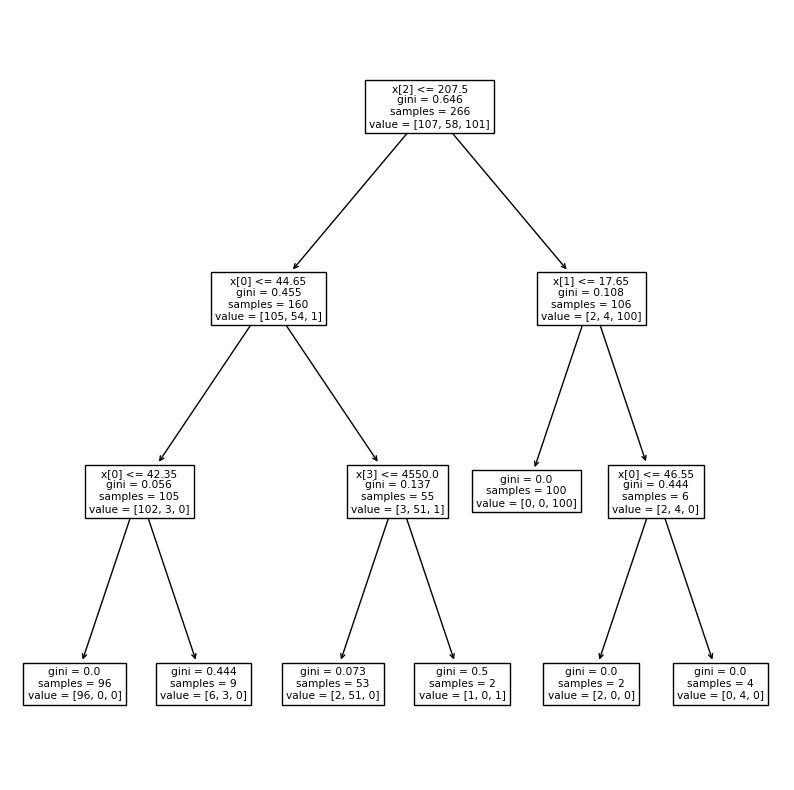

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(10,10))
plot_tree(tree_clf)      #fitting한 결과인 dtc를 plot_tree로 찍어본다.
plt.show()

In [ ]:
import pandas as pd
from sklearn import datasets

penguin_df = pd.read_csv('/content/penguins.csv')
penguin_df.isnull().sum()
df_dropna = penguin_df.dropna()
print(df_dropna.isnull().sum())
print(df_dropna.head())
print(df_dropna.describe())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668   

In [ ]:
import pandas as pd
from sklearn import datasets

dfX2 = df_dropna.iloc[:, 2:-1]
dfy2 = df_dropna['species']

dfX2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
from sklearn.model_selection import train_test_split
# 훈련/검증 자료 분류
X_train, X_test, y_train, y_test = train_test_split(dfX2, dfy2, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

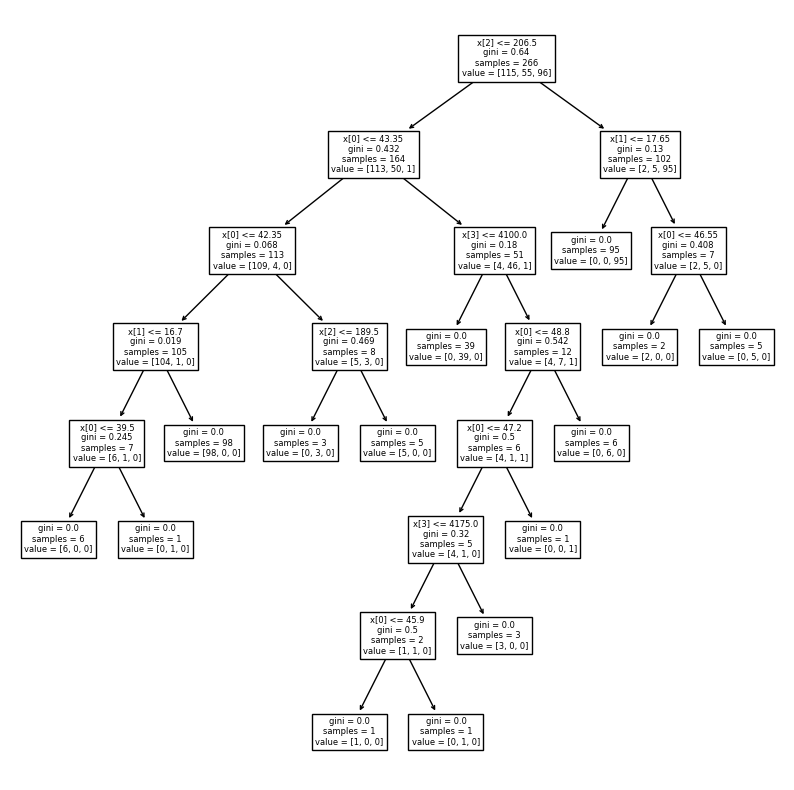

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()      #decisionTree 모델 가져오기
dtc.fit(X_train,y_train)            #데이터를 모델에 fitting 함

plt.figure(figsize=(10,10))
plot_tree(dtc)      #fitting한 결과인 dtc를 plot_tree로 찍어본다.
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
y_pred

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'], dtype=object)

In [ ]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


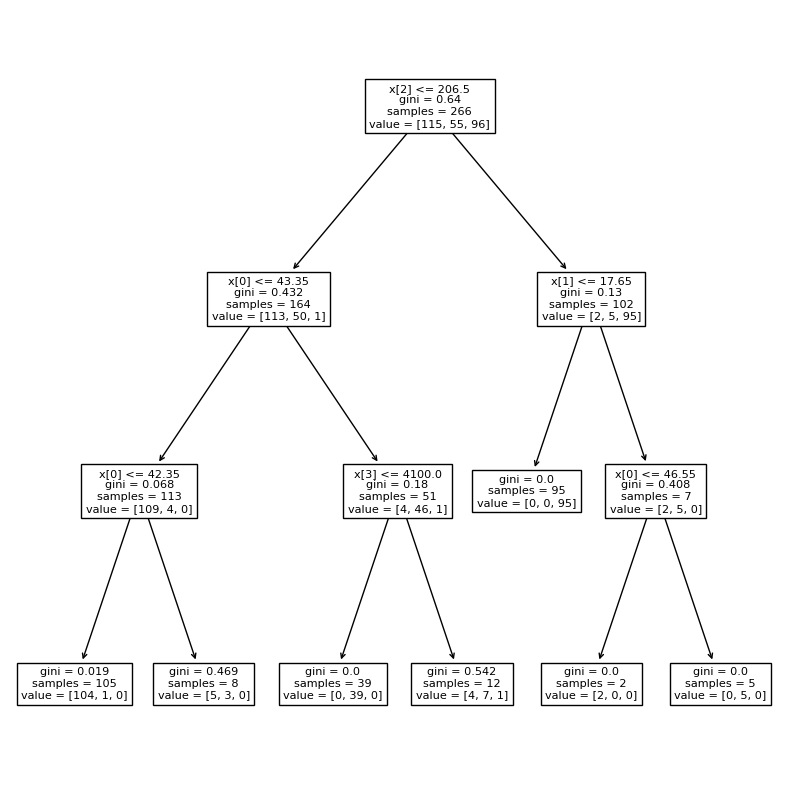

In [ ]:
# 최대깊이를 조절해서 과적합을 방지함
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  0.9850746268656716
